# 📈🏡 L'IA au service des agents immobiliers - ☀️ Silicon Valley

# 📊 Exploratory Data Analysis (EDA)

In [84]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.impute import KNNImputer

In [85]:
# load dataset
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [86]:
# basic informations about dataset (numbers of rows, columns)
df.shape

(16512, 11)

In [87]:
# check Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [88]:
# check for zeros in all columns 
df[df == 0].count()

Unnamed: 0            1
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [89]:
# count of missing values in dataset and where are they
df.isnull().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [90]:
# max & min values on total_bedrooms
print(df['total_bedrooms'].max())
print(df['total_bedrooms'].min())

6445.0
2.0


In [91]:
# replace missing values on total_bedrooms with KNN
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df['total_bedrooms'] = knn_imputer.fit_transform(df[['total_bedrooms']])

In [92]:
# number of missing values now on total_bedrooms
df['total_bedrooms'].isnull().sum()

0

In [93]:
# replace NaN by median on total_bedrooms
# df.total_bedrooms.fillna(df.total_bedrooms.mean(), inplace=True)

In [94]:
# remove unused column Unnamed: 0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [95]:
# see values on ocean_proximity
df['ocean_proximity'].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [96]:
# encoding values on ocean_proximity
# 1 is <1H OCEAN
# 2 is INLAND
# 3 is NEAR OCEAN
# 4 is NEAR BAY
# 5 is ISLAND

mapping = {'<1H OCEAN':'1','INLAND':'2', 'NEAR OCEAN':'3', 'NEAR BAY':'4', 'ISLAND':'5'}
df['ocean_proximity'] = df['ocean_proximity'].map(mapping)

In [97]:
# convert ocean_priximity "object" in "float"
df["ocean_proximity"] = df['ocean_proximity'].astype('float')

# Checking the target variable

In [98]:
# basic informations on median_house_value
df['median_house_value'].describe()

count     16512.000000
mean     206509.251453
std      115225.957661
min       14999.000000
25%      119400.000000
50%      179300.000000
75%      264500.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [99]:
# max & min value on median_house_value
print(df['median_house_value'].max())
print(df['median_house_value'].min())

500001.0
14999.0


C:\Users\veron\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


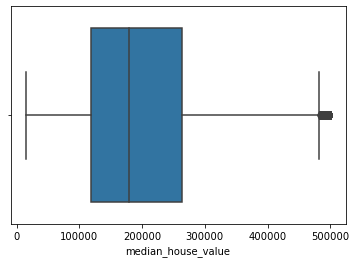

In [100]:
# boxplot
sns.boxplot(df['median_house_value'])
plt.show()

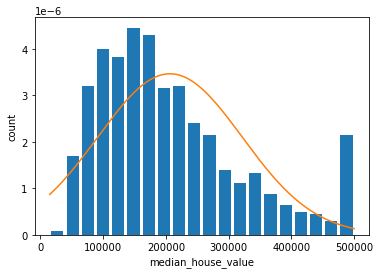

In [101]:
# plot bell curve with histogram
plt.hist(df.median_house_value, bins=20, rwidth=0.8, density=True)
plt.xlabel('median_house_value')
plt.ylabel('count')

rng = np.arange(df.median_house_value.min(), df.median_house_value.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.median_house_value.mean(),df.median_house_value.std()))

<AxesSubplot:>

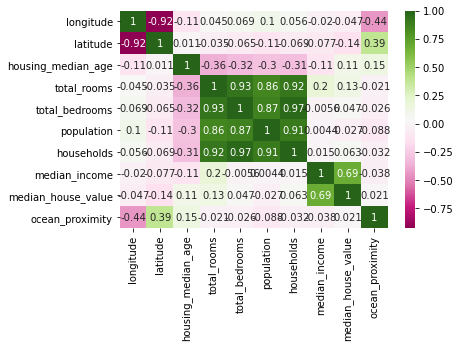

In [104]:
# correlation matrix
sns.heatmap(df.corr(), annot=True, cmap="PiYG")

In [105]:
# most correlated features 
corr = df.corr()
top_corr_features = corr.index[abs(corr['median_house_value'])>0.5]
top_corr_features

Index(['median_income', 'median_house_value'], dtype='object')

In [131]:
# import hvplot et scatter median_income with median_house_value
import hvplot.pandas
df.hvplot.scatter(x='median_income', y='median_house_value')

:Scatter   [median_income]   (median_house_value)

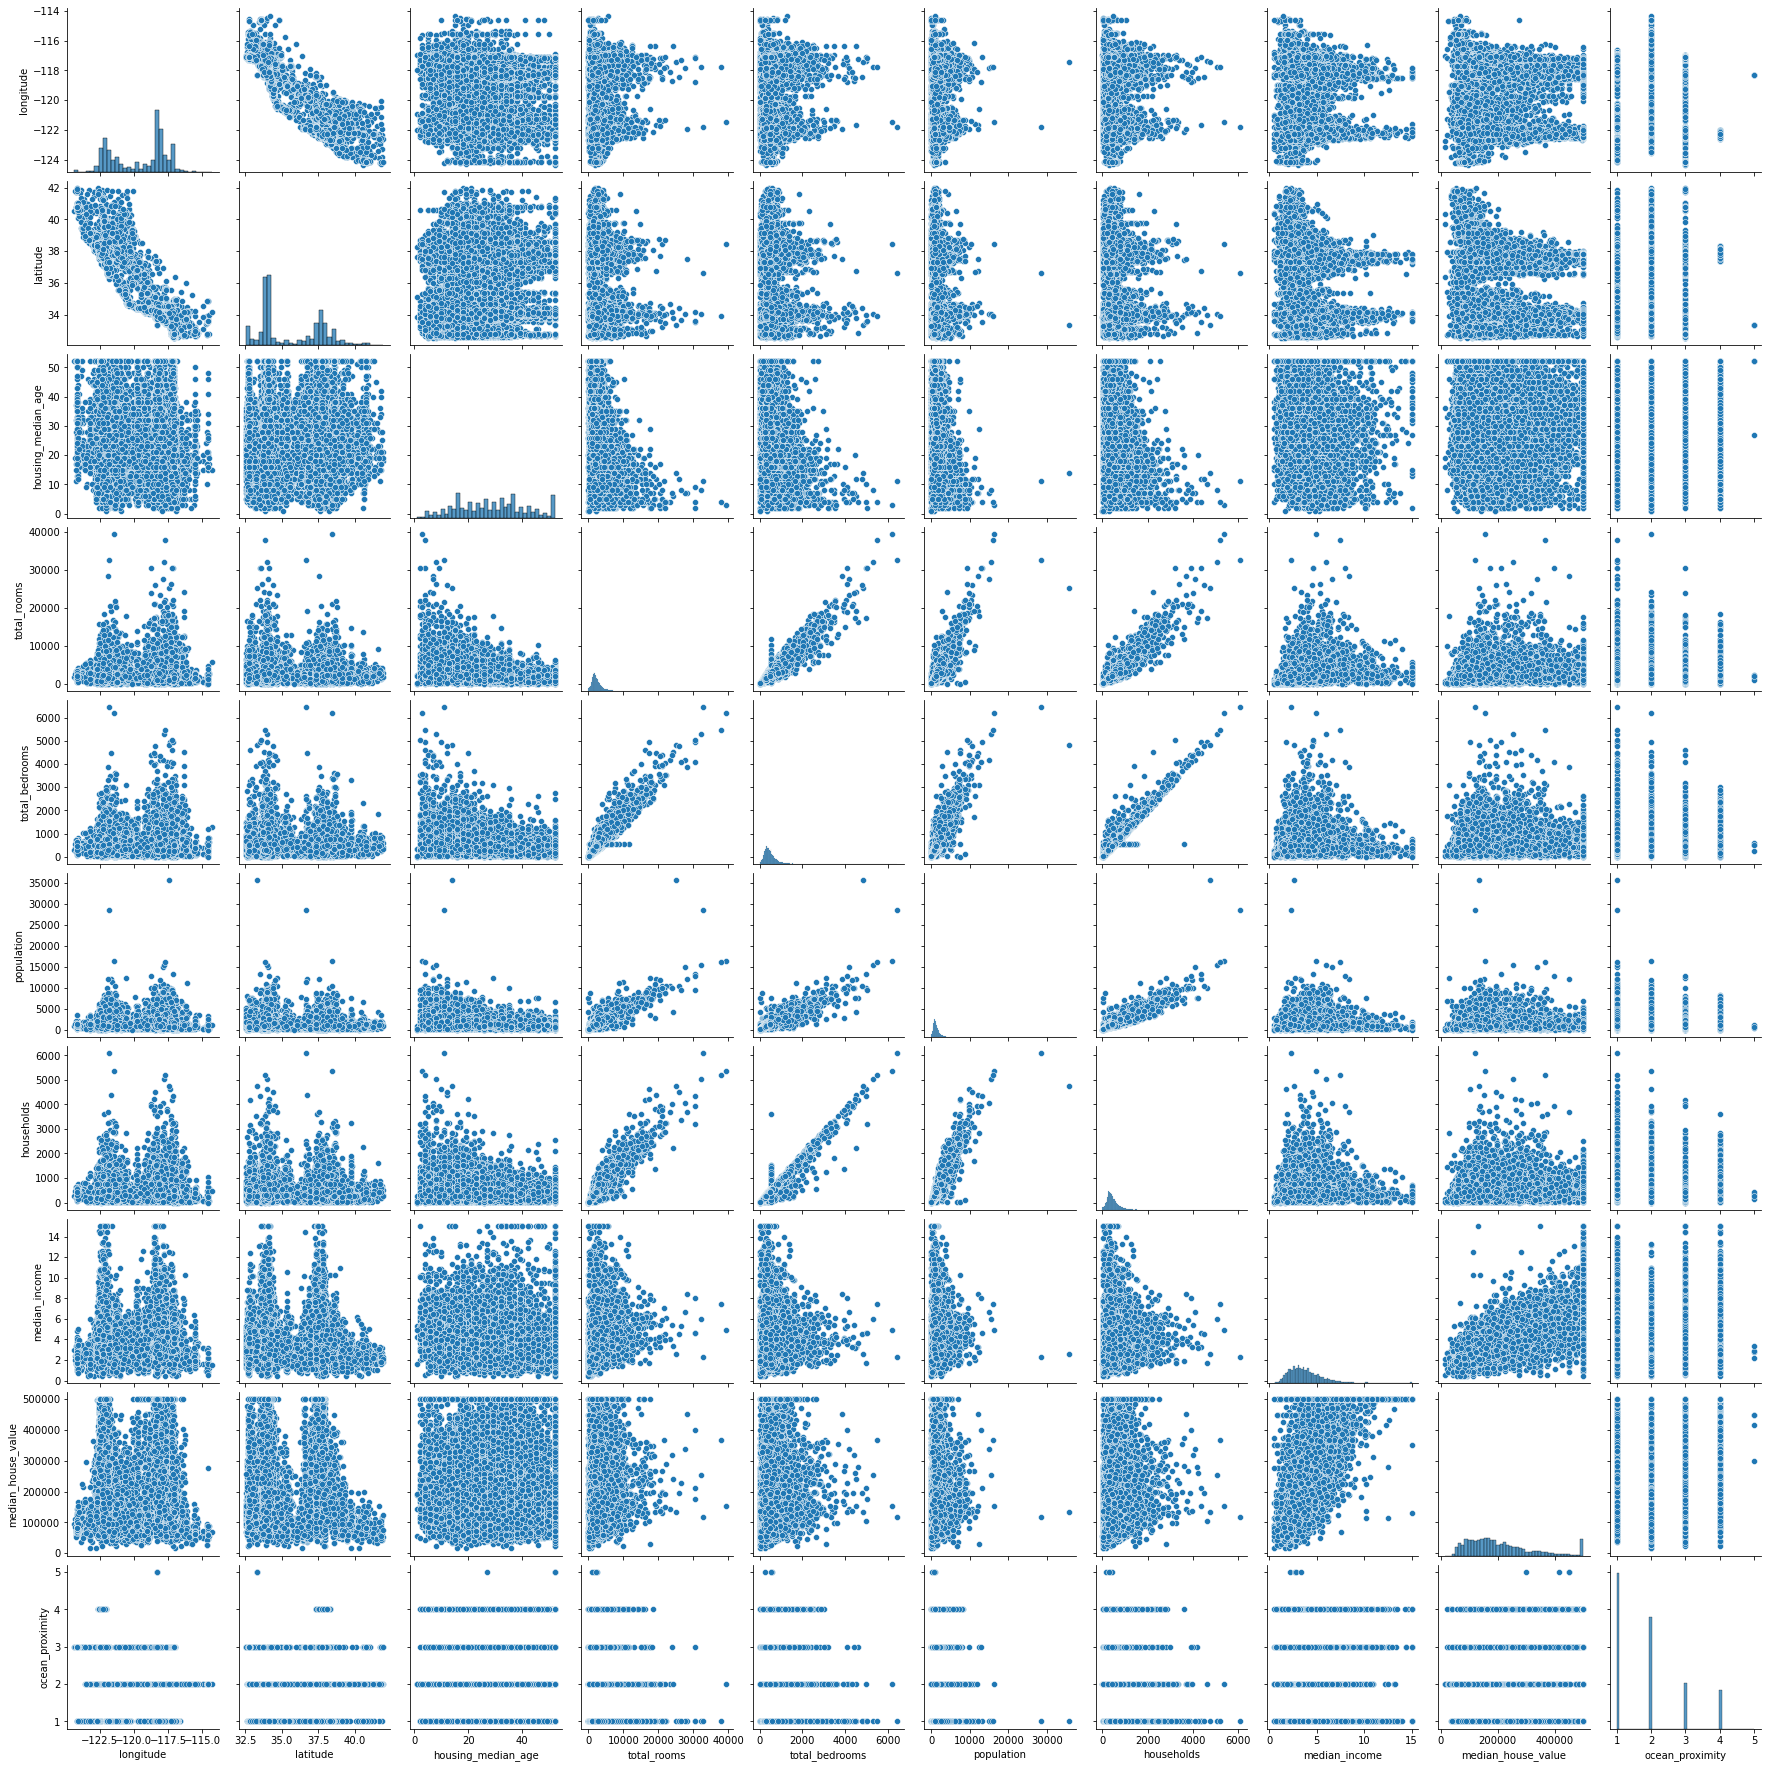

In [106]:
# pairplot
sns.pairplot(df)

In [107]:
# calculate zscore
df['zscore'] = ( df.median_house_value - df.median_house_value.mean() ) / df.median_house_value.std()
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,zscore
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,2.0,-1.167352
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0,0.586593
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,2.0,-1.286249
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0,-0.056491
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,2.0,-0.769004
5,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,315100.0,1.0,0.942416
6,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,500001.0,1.0,2.547097
7,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,172800.0,3.0,-0.292549
8,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,108100.0,2.0,-0.854055
9,-122.47,37.50,18.0,2297.0,416.0,1086.0,381.0,4.8750,334600.0,3.0,1.111648


In [108]:
# there is no z-score above 3, everything is OK
df[(df.zscore<-3) | (df.zscore>3)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,zscore


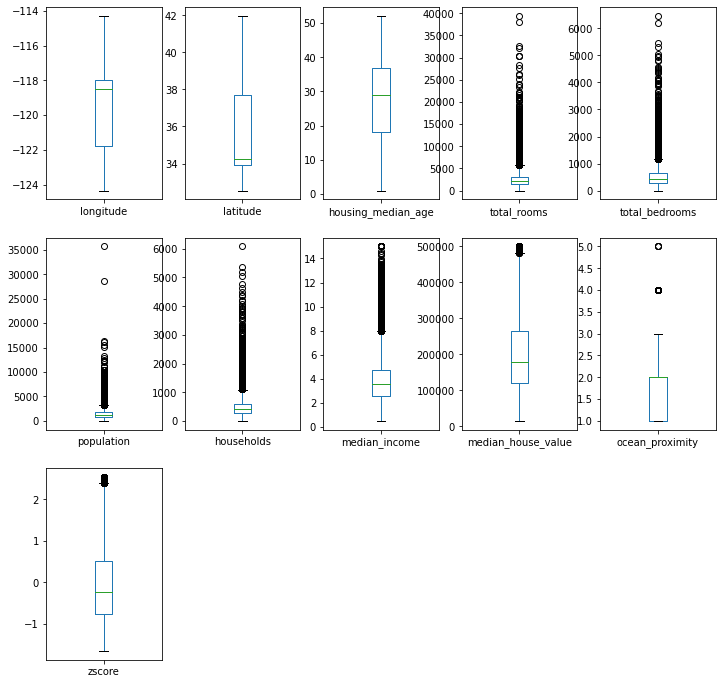

In [109]:
#individuel plot
df.plot(kind='box', subplots=True, layout=(3, 5), figsize=(12, 12));

# Define X & y

In [110]:
from sklearn import linear_model

X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

# Train Test

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Multiple linear regression

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

reg = LinearRegression(normalize=True)

reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [113]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [114]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.521e+30
Date:                Sun, 12 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:40:31   Log-Likelihood:             2.1605e+05
No. Observations:               11558   AIC:                        -4.321e+05
Df Residuals:                   11547   BIC:                        -4.320e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.065e+05   2.48

# Print the intercept

In [115]:
reg.intercept_

206509.25145348813

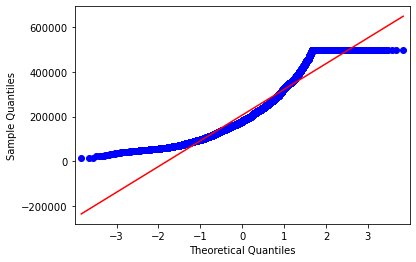

In [116]:
# qq plot for SalePrice
# qq plots can be imported from the statsmodels library
import statsmodels.api as sm 
sm.qqplot(df['median_house_value'], line='s')
plt.show()



In [119]:
test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________


NameError: name 'print_evaluate' is not defined